# Geography at Different Levels
This notebook demonstrates how to tackle geographies defined at various levels. For this purpose we will be using some Lanarkshire GPs as well as some hypothetical ones.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import shapely
from shapely.ops import unary_union
from shapely.geometry import mapping, Polygon
import matplotlib
matplotlib.rc('text',usetex=True)

## Districts and Sectors
Firstly, we read in shape files for districts and sectors.

In [2]:
districts = gpd.read_file('~/Desktop/GP_Boundaries/District_22_1/District_22_1.shp')

In [3]:
sectors = gpd.read_file('~/Desktop/GP_Boundaries/Sector_22_1/Sector_22_1.shp')

Check the first few items of the files.

In [4]:
districts.head(5) # districts

,OBJECTID,District,Shape_Leng,Shape_Area,geometry
0,1,AB10,17466.667741,4.591592e+06,"POLYGON ((394256.974 806666.497, 394264.000 80..."
1,2,AB11,26086.506732,5.396370e+06,"MULTIPOLYGON (((393211.114 805537.072, 393207...."
2,3,AB12,73839.045489,7.299857e+07,"MULTIPOLYGON (((396494.604 802552.201, 396491...."
3,4,AB13,15847.217768,8.770372e+06,"POLYGON ((386014.000 803318.000, 385991.953 80..."
4,5,AB14,27250.316419,1.754676e+07,"POLYGON ((383220.204 804258.703, 383230.799 80..."


In [5]:
sectors.head(5) # sectors

,OBJECTID,Sector,Shape_Leng,Shape_Area,geometry
0,1,AB10 1,7131.510278,7.130118e+05,"POLYGON ((394256.974 806666.497, 394264.000 80..."
1,2,AB10 6,12335.212789,1.505824e+06,"POLYGON ((393348.999 805786.000, 393364.000 80..."
2,3,AB10 7,11424.566022,2.372756e+06,"POLYGON ((393209.011 805132.125, 393206.363 80..."
3,4,AB11 5,13781.980960,1.219767e+06,"POLYGON ((395211.917 806599.168, 395275.000 80..."
4,5,AB11 6,7083.623538,7.724720e+05,"MULTIPOLYGON (((393211.114 805537.072, 393207...."


Check the dimension.

In [6]:
print(districts.shape)
print(sectors.shape)

(444, 5)
(958, 5)


## GP Information
Now we read in our GP information. Some of the practices are from Lanarkshire. For the purpose of testing, we have included two hypothetical practices. For simplicity, some edits have also been made to the Lanarkshire practices to ensure that they include, for example, a whole district, rather than just a portion of it.

In [7]:
hypo = pd.read_excel('./Geography.xls')

In [8]:
hypo = hypo.rename(columns = {'Practice Area as defiend in GMS Contract/17C Agreement':  'Areas'}) # rename

In [9]:
hypo

,Ref,Former GG&C Code,Practice Code,Practice Name,Contract,Practice Town,Locality,Unit,HSCP,Areas
0,2,46536.0,60073,Nalagatla Medical Practice,17J,Stepps,North Locality,North West Unit,North,"G33 6,G33 1,G66 5,G67 4,G69 0,G69 8,G69 9"
1,12,49642.0,60177,The Craigallian Avenue Practice,17J,Cambuslang,Cambuslang / Rutherglen,South West Unit,South,"G72 7,G72 8"
2,4,49002.0,60092,The Stonelaw Practice,17J,Rutherglen,Cambuslang / Rutherglen,South West Unit,South,"G40,G42,G44,G45,G60,G61,G62,G63,G64,G65,G66,G6..."
3,15,49799.0,60209,Ardoch Medical Practice,17J,Cambuslang,Cambuslang / Rutherglen,South West Unit,South,G72
4,100,NaN,66666,Hypothetical One,17J,Cambuslang,Cambuslang / Rutherglen,South West Unit,South,"G72,G73,G69 6,G69 7,G71 5"
5,101,NaN,66667,Hypothetical Two,17J,Cambuslang,Cambuslang / Rutherglen,South West Unit,South,"G74 1,G74 2,G74 3,G74 4,G68,G69"


### Seperating the areas
Notice the areas are seperated by commas for a practice. We split them into individual rows.

In [10]:
hyposplit = hypo.set_index(['Practice Code','Practice Name']).Areas.str.split(',',expand=True).stack().reset_index().rename(columns={0:'Areas'})

In [11]:
hyposplit.head(5)

,Practice Code,Practice Name,level_2,Areas
0,60073,Nalagatla Medical Practice,0,G33 6
1,60073,Nalagatla Medical Practice,1,G33 1
2,60073,Nalagatla Medical Practice,2,G66 5
3,60073,Nalagatla Medical Practice,3,G67 4
4,60073,Nalagatla Medical Practice,4,G69 0


In [12]:
hyposplit

,Practice Code,Practice Name,level_2,Areas
0,60073,Nalagatla Medical Practice,0,G33 6
1,60073,Nalagatla Medical Practice,1,G33 1
2,60073,Nalagatla Medical Practice,2,G66 5
3,60073,Nalagatla Medical Practice,3,G67 4
4,60073,Nalagatla Medical Practice,4,G69 0
5,60073,Nalagatla Medical Practice,5,G69 8
6,60073,Nalagatla Medical Practice,6,G69 9
7,60177,The Craigallian Avenue Practice,0,G72 7
8,60177,The Craigallian Avenue Practice,1,G72 8
9,60092,The Stonelaw Practice,0,G40


### Distinguishing between districts and areas
The areas consist of both postcode districts and sectors. We want seperate columns for them. As seen above, postcode sectors contain an extra space within the string. We can use this property to seperate them from districts.

In [13]:
mask = hyposplit.Areas.str.contains(" ") 

The $\texttt{mask}$ object above contains boolean results (True/False). True means there is a space in thes string and is therefore a postcode sector.

We then have to use the results above to extract the districts and sectors, and create columns for them. We can also remove the original column now.

In [14]:
hyposplit['District'] = hyposplit[mask==False]['Areas'] # Create a District column
hyposplit['Sector'] = hyposplit[mask]['Areas']          # Create a Sector column
hyposplit = hyposplit.drop('level_2',1)                 # Drop irelevant columns
hyposplit = hyposplit.drop('Areas',1)

C:\Users\yeehil01\AppData\Local\Temp\ipykernel_1444\1652159046.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hyposplit = hyposplit.drop('level_2',1)                 # Drop irelevant columns
C:\Users\yeehil01\AppData\Local\Temp\ipykernel_1444\1652159046.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hyposplit = hyposplit.drop('Areas',1)


In [15]:
hyposplit

,Practice Code,Practice Name,District,Sector
0,60073,Nalagatla Medical Practice,NaN,G33 6
1,60073,Nalagatla Medical Practice,NaN,G33 1
2,60073,Nalagatla Medical Practice,NaN,G66 5
3,60073,Nalagatla Medical Practice,NaN,G67 4
4,60073,Nalagatla Medical Practice,NaN,G69 0
5,60073,Nalagatla Medical Practice,NaN,G69 8
6,60073,Nalagatla Medical Practice,NaN,G69 9
7,60177,The Craigallian Avenue Practice,NaN,G72 7
8,60177,The Craigallian Avenue Practice,NaN,G72 8
9,60092,The Stonelaw Practice,G40,NaN


Check the shape of the data.

In [16]:
hyposplit.shape

(39, 4)

## Merging with district and sector shape files
The next step is to merge our GP data with the district and sector shape files from earlier. We will have to merge three data frames together, while removing the irelevant data.

In [17]:
merged = pd.merge(hyposplit,sectors,on='Sector',how='outer')   # Firstly merge with sector data to get their geometries
merged = merged.head(39)                                       # and remove irrelevant rows
merged = pd.merge(merged,districts,on='District',how='outer')  # Now merge with district data for their geometries
merged = merged.head(39)                                       # Again we keep only rows with our GP data

In [18]:
merged.head(5)

,Practice Code,Practice Name,District,Sector,OBJECTID_x,Shape_Leng_x,Shape_Area_x,geometry_x,OBJECTID_y,Shape_Leng_y,Shape_Area_y,geometry_y
0,60073.0,Nalagatla Medical Practice,NaN,G33 6,405.0,13187.797508,5.534912e+06,"POLYGON ((267475.808 668112.939, 267522.051 66...",NaN,NaN,NaN,None
1,60073.0,Nalagatla Medical Practice,NaN,G33 1,400.0,17953.029367,4.046323e+06,"POLYGON ((263854.270 669613.771, 263879.607 66...",NaN,NaN,NaN,None
2,60073.0,Nalagatla Medical Practice,NaN,G66 5,467.0,24961.336020,9.534817e+06,"POLYGON ((270799.000 673152.000, 270704.000 67...",NaN,NaN,NaN,None
3,60073.0,Nalagatla Medical Practice,NaN,G67 4,473.0,27310.140398,1.185204e+07,"MULTIPOLYGON (((274681.560 672719.400, 274681....",NaN,NaN,NaN,None
4,60073.0,Nalagatla Medical Practice,NaN,G69 0,476.0,9989.427151,3.937652e+06,"POLYGON ((270896.401 672086.297, 270904.003 67...",NaN,NaN,NaN,None


Notice that we now have two sets of data, with suffixes x and y. In particular, we can merge geometry_x and geometry_y together. We only demonstrate with the geometry data here, but this of course can be done with other columns as well such as Shape_Area.

In [19]:
# Create a dummy data frame without the geometry columns
no_geometry = merged.drop('geometry_x',1)
no_geometry = no_geometry.drop('geometry_y',1)

C:\Users\yeehil01\AppData\Local\Temp\ipykernel_1444\1354355844.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  no_geometry = merged.drop('geometry_x',1)
C:\Users\yeehil01\AppData\Local\Temp\ipykernel_1444\1354355844.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  no_geometry = no_geometry.drop('geometry_y',1)


In [20]:
# Merge the geometry columns, and also merge with our dummy data frame
# Rename the merged column back to Geometry
clean_merged = pd.concat([no_geometry,merged['geometry_x'].combine_first(merged['geometry_y'])],
                        axis=1)
clean_merged.rename(columns={'geometry_x':'geometry'},inplace=True)

In [21]:
clean_merged

,Practice Code,Practice Name,District,Sector,OBJECTID_x,Shape_Leng_x,Shape_Area_x,OBJECTID_y,Shape_Leng_y,Shape_Area_y,geometry
0,60073.0,Nalagatla Medical Practice,NaN,G33 6,405.0,13187.797508,5.534912e+06,NaN,NaN,NaN,"POLYGON ((267475.808 668112.939, 267522.051 66..."
1,60073.0,Nalagatla Medical Practice,NaN,G33 1,400.0,17953.029367,4.046323e+06,NaN,NaN,NaN,"POLYGON ((263854.270 669613.771, 263879.607 66..."
2,60073.0,Nalagatla Medical Practice,NaN,G66 5,467.0,24961.336020,9.534817e+06,NaN,NaN,NaN,"POLYGON ((270799.000 673152.000, 270704.000 67..."
3,60073.0,Nalagatla Medical Practice,NaN,G67 4,473.0,27310.140398,1.185204e+07,NaN,NaN,NaN,"MULTIPOLYGON (((274681.560 672719.400, 274681...."
4,60073.0,Nalagatla Medical Practice,NaN,G69 0,476.0,9989.427151,3.937652e+06,NaN,NaN,NaN,"POLYGON ((270896.401 672086.297, 270904.003 67..."
5,60073.0,Nalagatla Medical Practice,NaN,G69 8,479.0,25661.284536,1.101057e+07,NaN,NaN,NaN,"POLYGON ((271005.000 670582.000, 271073.000 67..."
6,60073.0,Nalagatla Medical Practice,NaN,G69 9,480.0,15738.227929,7.589060e+06,NaN,NaN,NaN,"POLYGON ((267744.358 671589.358, 267747.997 67..."
7,60177.0,The Craigallian Avenue Practice,NaN,G72 7,487.0,29968.365470,8.778630e+06,NaN,NaN,NaN,"POLYGON ((263674.700 661654.403, 263700.796 66..."
8,60177.0,The Craigallian Avenue Practice,NaN,G72 8,488.0,21208.639820,1.257245e+07,NaN,NaN,NaN,"POLYGON ((263547.640 660816.114, 263587.258 66..."
9,66666.0,Hypothetical One,NaN,G69 6,477.0,16451.909711,5.342741e+06,NaN,NaN,NaN,"POLYGON ((269738.000 666100.000, 269972.000 66..."


Double check the dimension (number of rows should be 39). This should match with the dimension of the original GP data.

In [22]:
clean_merged.shape

(39, 11)

Sort the data according to the GP practices.

In [23]:
clean_merged = clean_merged.sort_values(by=['Practice Code'])

In [24]:
clean_merged

,Practice Code,Practice Name,District,Sector,OBJECTID_x,Shape_Leng_x,Shape_Area_x,OBJECTID_y,Shape_Leng_y,Shape_Area_y,geometry
0,60073.0,Nalagatla Medical Practice,NaN,G33 6,405.0,13187.797508,5.534912e+06,NaN,NaN,NaN,"POLYGON ((267475.808 668112.939, 267522.051 66..."
1,60073.0,Nalagatla Medical Practice,NaN,G33 1,400.0,17953.029367,4.046323e+06,NaN,NaN,NaN,"POLYGON ((263854.270 669613.771, 263879.607 66..."
2,60073.0,Nalagatla Medical Practice,NaN,G66 5,467.0,24961.336020,9.534817e+06,NaN,NaN,NaN,"POLYGON ((270799.000 673152.000, 270704.000 67..."
3,60073.0,Nalagatla Medical Practice,NaN,G67 4,473.0,27310.140398,1.185204e+07,NaN,NaN,NaN,"MULTIPOLYGON (((274681.560 672719.400, 274681...."
4,60073.0,Nalagatla Medical Practice,NaN,G69 0,476.0,9989.427151,3.937652e+06,NaN,NaN,NaN,"POLYGON ((270896.401 672086.297, 270904.003 67..."
5,60073.0,Nalagatla Medical Practice,NaN,G69 8,479.0,25661.284536,1.101057e+07,NaN,NaN,NaN,"POLYGON ((271005.000 670582.000, 271073.000 67..."
6,60073.0,Nalagatla Medical Practice,NaN,G69 9,480.0,15738.227929,7.589060e+06,NaN,NaN,NaN,"POLYGON ((267744.358 671589.358, 267747.997 67..."
22,60092.0,The Stonelaw Practice,G62,NaN,NaN,NaN,NaN,165.0,34929.342069,3.612370e+07,"POLYGON ((251897.406 679000.724, 251917.499 67..."
23,60092.0,The Stonelaw Practice,G63,NaN,NaN,NaN,NaN,166.0,197520.537582,3.370592e+08,"MULTIPOLYGON (((237387.020 686244.250, 237386...."
24,60092.0,The Stonelaw Practice,G64,NaN,NaN,NaN,NaN,167.0,35707.993987,3.036138e+07,"POLYGON ((259709.000 677070.000, 259634.000 67..."


## Plots
We can plot the results out as a sanity check. First of all, we must convert our data frame back to a geo-data frame.

In [25]:
clean_merged = gpd.GeoDataFrame(clean_merged, crs="EPSG:4326")

C:\Users\yeehil01\AppData\Local\Temp\ipykernel_1444\701948688.py:1: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  clean_merged = gpd.GeoDataFrame(clean_merged, crs="EPSG:4326")


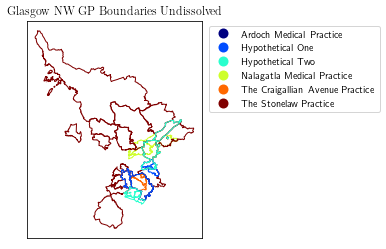

In [26]:
clean_merged.plot('Practice Name',facecolor='none',cmap=plt.cm.jet,legend=True,legend_kwds={'bbox_to_anchor':(2.05, 1)})
plt.title(r'$\textrm{Glasgow NW GP Boundaries Undissolved}$')
plt.xticks([])
plt.yticks([])
plt.savefig('geography_test.pdf', bbox_inches='tight')

In [27]:
clean_merged.to_file('./undissolved.shp') # save this to shape file

C:\Users\yeehil01\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\yeehil01\AppData\Local\Temp\ipykernel_1444\4268178294.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  clean_merged.to_file('./undissolved.shp') # save this to shape file


## Merging postcode sectors
We are interested in the GP boundaries instead of individual postcode districts and sectors. Therefore, we dissolve the boundaries and merge the geographies.

In [28]:
dissolved = clean_merged.dissolve(by='Practice Code')

In [29]:
dissolved

,geometry,Practice Name,District,Sector,OBJECTID_x,Shape_Leng_x,Shape_Area_x,OBJECTID_y,Shape_Leng_y,Shape_Area_y
Practice Code,,,,,,,,,,
60073.0,"MULTIPOLYGON (((263951.414 669614.226, 263951....",Nalagatla Medical Practice,None,G33 6,405.0,13187.797508,5.534912e+06,NaN,NaN,NaN
60092.0,"MULTIPOLYGON (((237382.680 686244.650, 237381....",The Stonelaw Practice,G62,None,NaN,NaN,NaN,165.0,34929.342069,3.612370e+07
60177.0,"POLYGON ((267795.000 658455.000, 267839.000 65...",The Craigallian Avenue Practice,None,G72 8,488.0,21208.639820,1.257245e+07,NaN,NaN,NaN
60209.0,"POLYGON ((263674.700 661654.403, 263700.796 66...",Ardoch Medical Practice,G72,None,NaN,NaN,NaN,174.0,38454.360455,3.575193e+07
66666.0,"MULTIPOLYGON (((263707.027 661543.484, 263716....",Hypothetical One,G73,G71 5,481.0,13157.246865,4.248974e+06,175.0,25828.118056,1.107882e+07
66667.0,"MULTIPOLYGON (((265970.305 654873.266, 265938....",Hypothetical Two,G69,G74 4,498.0,18136.275165,6.806923e+06,172.0,44816.170187,3.155747e+07


As seen, the results are now grouped by GP Practice Code. We can plot again to have a look. Some boundaries have disappeared now, as expected.

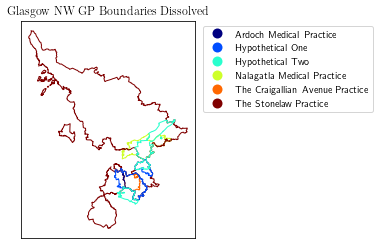

In [30]:
dissolved.plot('Practice Name',facecolor='none',cmap=plt.cm.jet,legend=True,legend_kwds={'bbox_to_anchor':(2.05, 1)})
plt.title(r'$\textrm{Glasgow NW GP Boundaries Dissolved}$')
plt.xticks([])
plt.yticks([])
plt.savefig('geography_dissolved.pdf', bbox_inches='tight')

Finally, we can save this to a shape file and read in using ArcPro.

In [31]:
dissolved.to_file('./geographies.shp')

C:\Users\yeehil01\AppData\Local\Temp\ipykernel_1444\3653566836.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  dissolved.to_file('./geographies.shp')
